In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:33<00:00, 38.3MB/s]
100% 1.06G/1.06G [00:33<00:00, 34.0MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)  
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)  
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 71s 92ms/step - loss: 0.6543 - accuracy: 0.6008 - val_loss: 0.5750 - val_accuracy: 0.7130
Epoch 2/10
625/625 [==============================] - 57s 90ms/step - loss: 0.4859 - accuracy: 0.7657 - val_loss: 0.4746 - val_accuracy: 0.7826
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3538 - accuracy: 0.8432 - val_loss: 0.5322 - val_accuracy: 0.7858
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.2167 - accuracy: 0.9104 - val_loss: 0.8019 - val_accuracy: 0.7648
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.1223 - accuracy: 0.9515 - val_loss: 0.8895 - val_accuracy: 0.7868
Epoch 6/10
625/625 [==============================] - 57s 90ms/step - loss: 0.0777 - accuracy: 0.9722 - val_loss: 0.9635 - val_accuracy: 0.7772
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0562 - accuracy: 0.9801 - val_loss: 1.1747 - val_accuracy:

In [21]:
history.history

{'loss': [0.6542831659317017,
  0.4858511686325073,
  0.35381966829299927,
  0.2166672796010971,
  0.12233185023069382,
  0.07766515761613846,
  0.05615577474236488,
  0.05036424845457077,
  0.0372910276055336,
  0.03157871961593628],
 'accuracy': [0.6007999777793884,
  0.7656999826431274,
  0.8431500196456909,
  0.9104499816894531,
  0.9514999985694885,
  0.9721999764442444,
  0.9800999760627747,
  0.9837499856948853,
  0.9874500036239624,
  0.990149974822998],
 'val_loss': [0.5749870538711548,
  0.4746330976486206,
  0.5321854948997498,
  0.8018666505813599,
  0.8894633054733276,
  0.9635136723518372,
  1.1746872663497925,
  1.1635618209838867,
  1.221706509590149,
  1.2151864767074585],
 'val_accuracy': [0.7129999995231628,
  0.7825999855995178,
  0.7857999801635742,
  0.7648000121116638,
  0.7868000268936157,
  0.7771999835968018,
  0.7788000106811523,
  0.7806000113487244,
  0.7856000065803528,
  0.7742000222206116]}

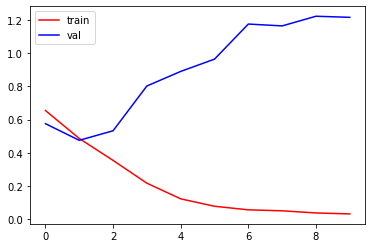

In [28]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='val')
plt.legend()

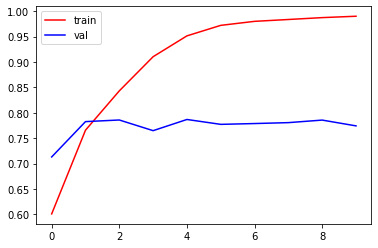

In [29]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='val')
plt.legend()